In [1]:
import pandas as pd

In [2]:
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('HR_comma_sep.csv')

In [4]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [5]:
left = df[df['left'] == 1]           # no of left candidates
left.shape

(3571, 10)

In [6]:
retain = df[df['left'] == 0]         # no of remaining candidates
retain.shape

(11428, 10)

<Axes: xlabel='salary'>

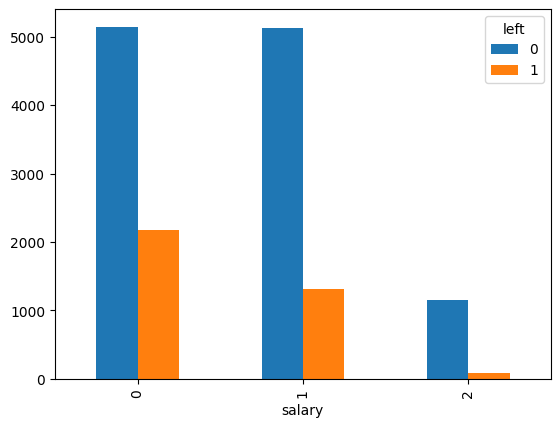

In [42]:
# graph of retained candidates and sal as bar plot 
pd.crosstab(df['salary'],df['left']).plot(kind = 'bar')

<Axes: xlabel='Department'>

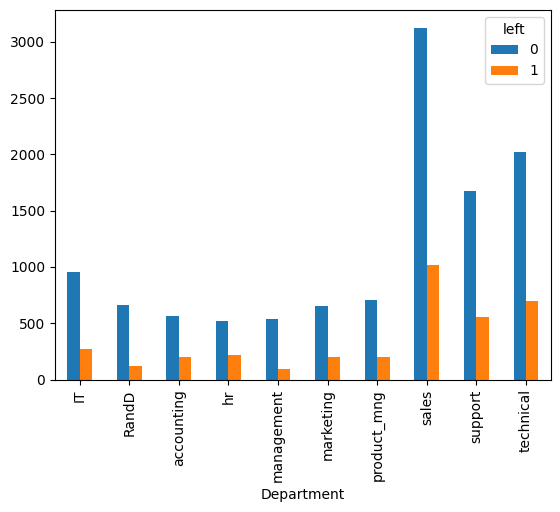

In [8]:
# graph of retained candidates and department of employees as bar plot 
pd.crosstab(df['Department'],df['left']).plot(kind = 'bar')

In [50]:
df = df.replace({'low':0, 'medium':1, 'high':2})
a = df.drop(columns=['Department'])
a.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.098119
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,1.000000


In [10]:
X = df.drop(columns=['last_evaluation', 'number_project', 'time_spend_company', 'Work_accident', 'Department','left'])
X

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,0
1,0.80,262,0,1
2,0.11,272,0,1
3,0.72,223,0,0
4,0.37,159,0,0
...,...,...,...,...
14994,0.40,151,0,0
14995,0.37,160,0,0
14996,0.37,143,0,0
14997,0.11,280,0,0


In [45]:
Y = df['left']


,satisfaction_level,average_montly_hours,promotion_last_5years,salary
satisfaction_level,1.000000,-0.020048,0.025605,0.050022
average_montly_hours,-0.020048,1.000000,-0.003544,-0.002242
promotion_last_5years,0.025605,-0.003544,1.000000,0.098119
salary,0.050022,-0.002242,0.098119,1.000000


In [12]:
from sklearn.linear_model import LogisticRegression


In [37]:
from sklearn.model_selection import train_test_split
#X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1)

In [54]:
model = LogisticRegression()
model.fit(X,Y)

LogisticRegression()

In [55]:
model.score(X,Y)

0.7811854123608241